<a href="https://colab.research.google.com/github/octaviosidoni/DataScience/blob/main/PrimeraEntrega_SidoniOctavio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definicion de Objetivo
 ¿Como podemos controlar el crecimiento exponencial de accidentes en EE.UU?

#Contextos Comercial - Empresarial - Analitico

###**Contexto Comercial**: El objetivo es  formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas, con el fin de llegar a una conclusion que explique el crecimiento de los accidentes.

###**Contexto Empresarial:** Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, donde se puede observar un crecimiento significativo en la cantidad de accidentes a traves de los años.

###**Contexto Analitico**
Se proporciona un archivo CSV que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, severidad, dia, temperatuza, zona, estado, etc. Definiendo la columna "Severity" como la variable target a analizar en los estudios correspondientes del trabajo.


#Problema Comercial
Manipular los datos disponibles, analizarlos y crear visualizaciones que respondand las siguines preguntas.

###Preguntas a responder:


1.   ¿Los accidentes registrados ocurren a lo largo y a lo ancho de EE. UU?
2.   ¿Varía la cantidad de accidentes dependiendo de la zona horaria?
3.   ¿Aumentan los accidentes a traves de los años?
4.   ¿Como influye el horario, dia de semana y mes en la cantidad de accidentes?
5.   ¿Influye el lado de circulacion en el accidente?
6.   ¿Como influye el clima en la cantidad de accidentes?

#Data Adquisition

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px



###**Descripcion del Data Set** :
Este es un conjunto de datos de accidentes automovilísticos de todo el país (EE.UU), que cubre 49 estados. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes de tráfico. Actualmente, hay alrededor de 2,8 millones de registros de accidentes en este conjunto de datos.

Poder predecir cual es el nivel de impacto que tiene en el transito un accidente, utilizando como target la columna "Severity "; teniendo en cuenta las variables:

1. ID: Este es un identificador único del registro de accidentes.
2. Severity: Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, una breve demora como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, una gran demora).
3.  Start_Time: Muestra la hora de inicio del accidente en la zona horaria local.
4. End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
5. Start_Lat: Muestra la latitud en coordenadas GPS del punto de inicio.
6. Start_Lng: Muestra la longitud en coordenadas GPS del punto de inicio.
7. End_Lat: Muestra la latitud en coordenadas GPS del punto de fin.
8. End_Lng: Muestra la longitud en coordenadas GPS del punto de fin.
9. Distance(mi): La longitud de la extensión de la carretera afectada por el accidente.
10. Description: Muestra una descripción proporcionada por humanos del accidente.
11. Number: Muestra el número de calle en el campo de dirección
12. Street: Muestra el nombre de la calle en el campo de dirección.
13. Side: Muestra el lado relativo de la calle (Derecha/Izquierda) en el campo de dirección.
14. City: Muestra la ciudad en el campo de dirección.
15. County: Muestra el pais en el campo de dirección.
16. State: Muestra el condado en el campo de dirección.
17. Zipcode: Muestra el codigo postal en el campo de dirección.
18. Country: Muestra el pais en el campo de dirección.
18. Timezone: Muestra la zona horaria según la ubicación del accidente (este, centro, etc.).
19. Airport_Code: Indica una estación meteorológica en el aeropuerto que es la más cercana al lugar del accidente.
20. Weather_Timestamp: Muestra la marca de tiempo del registro de observación meteorológica (en hora local).
21. Temperature(F): Muestra la temperatura (en Fahrenheit).
22. Wind_Chill(F): Muestra la sensación térmica (en Fahrenheit).
23. Humidity(%): Muestra la humedad (en porcentaje).
24. Pressure(in): Muestra la presión del aire (en pulgadas).
25. Visibility(mi): Muestra la visibilidad (en millas).
26. Wind_Direction: Muestra la dirección del viento.
27. Wind_Speed(mph): Muestra la velocidad del viento (en millas por hora).
28. Precipitation(in): Muestra la cantidad de precipitación en pulgadas, si hay alguna.
29. Weather_Condition: Muestra las condiciones meteorológicas (lluvia, nieve, tormenta, niebla, etc.)
30. Amenity: Una anotación de PDI que indica la presencia de un servicio en un lugar cercano.
31. Bump: Una anotación de PDI que indica la presencia de badenes o jorobas en un lugar cercano.
32. Crossing: Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.
33. Give_Way: Una anotación de PDI que indica la presencia de ceder el paso en una ubicación cercana.
34. Junction: Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.
35. No_Exit: Una anotación de PDI que indica la presencia de ninguna salida en una ubicación cercana.
36. Railway: Una anotación de PDI que indica la presencia de vías férreas en un lugar cercano.
37. Roundabout: Una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana.
38. Station: Una anotación de PDI que indica la presencia de una estación en una ubicación cercana.
39. Stop: Una anotación de PDI que indica la presencia de una parada en una ubicación cercana.
40. Traffic_Calming: Una anotación de PDI que indica la presencia de pacificación del tráfico en un lugar cercano.
41. Traffic_Signal: Una anotación de PDI que indica la presencia de un semáforo en un lugar cercano.
42. Turning_Loop: Una anotación de PDI que indica la presencia de un bucle de giro en una ubicación cercana.
43. Sunrise_Sunset: Muestra el período del día (es decir, día o noche) en función del amanecer/atardecer.
44. Civil_Twilight: Muestra el período del día (es decir, día o noche) según el crepúsculo civil.
45. Nautical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo náutico.
46. Astronomical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo astronomico.

#Exploratoy Data Analysis EDA

In [ ]:
#Importamos el Data Set
Df= pd.read_csv('/content/drive/MyDrive/CoderHouse/DataScience/Entregas/1 Entrega/Data Sets/US_Accidents_Dec21_updated.csv')

In [ ]:
#Pasos Exploratorios
Df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
Df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
Df.shape

(2845342, 47)

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
Df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

#Hipotesis y preguntas a responder
1.   ¿Los accidentes registrados ocurren a lo largo y a lo ancho de EE. UU?
2.   ¿Varía la cantidad de accidentes dependiendo de la zona horaria?
3.   ¿Aumentan los accidentes a traves de los años?
4.   ¿Como influye el horario, dia de semana y mes en la cantidad de accidentes?
5.   ¿Influye el lado de circulacion en el accidente?
6.   Top 10 ciudades con mayor numero de accidentes

##1er Pregunta.##
##¿Los accidentes registrados ocurren a lo largo y a lo ancho de EE. UU?
Cuando miramos la latitud y la longitud de los accidentes, podemos ver que los accidentes se distribuyen de manera similar al mapa de América. Este no es un resultado sorprendente, asumiendo que los accidentes ocurrieron en Estados Unidos.

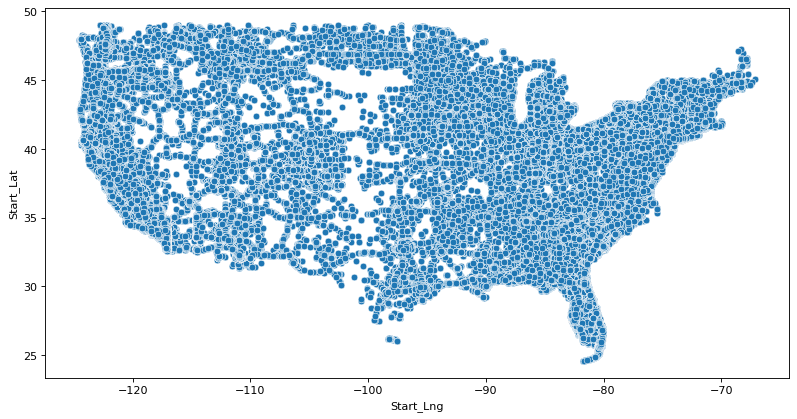

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax= sns.scatterplot(x = Df.Start_Lng, y = Df.Start_Lat)
plt.show()

##2da Pregunta
##¿Varía la cantidad de accidentes dependiendo de la zona horaria?
A traves del analisis llegamos a la conclusion que en las zonas costeras se producen el mayor numero de accidentes, agrupando el 77% del total de los accidentes en EE.UU

1.   US/Eastern	= 43%
2.   US/Pacific	= 34%
3.   US/Central	= 17%
4.   US/Mountain= 5%

In [ ]:
DfZona = Df.groupby('Timezone')['Severity'].count().reset_index().rename(columns={'index':'TimeZone', 'Severity':'Cases'})
DfZona

,Timezone,Cases
0,US/Central,488065
1,US/Eastern,1221927
2,US/Mountain,164597
3,US/Pacific,967094


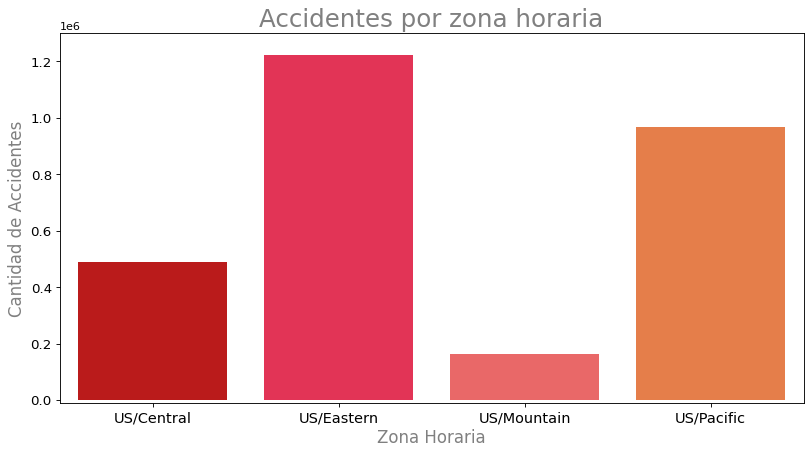

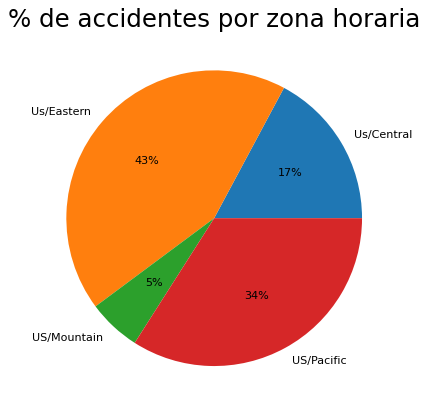

In [ ]:
ig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=DfZona['Cases'], x=DfZona['Timezone'],  palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])
plt.ylim(-10000, 1300000)
plt.title('Accidentes por zona horaria', size=22, color='grey')
plt.ylabel('Cantidad de Accidentes', fontsize=15, color='grey')
plt.xlabel('Zona Horaria', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

ZonaHoraria= ["Us/Central" , "Us/Eastern", "US/Mountain", "US/Pacific"]
fig, ax= plt.subplots(figsize=(18,6),dpi = 80)
plt.pie(DfZona['Cases'], labels= ZonaHoraria, autopct='%0.1i%%' )
ax.set_title("% de accidentes por zona horaria", fontsize=22)
plt.show()


##3ra Pregunta
## ¿Aumentan los accidentes a traves de los años?
Notamos un crecimiento exponencial en la cantidad de accidentes a medida que pasan los años

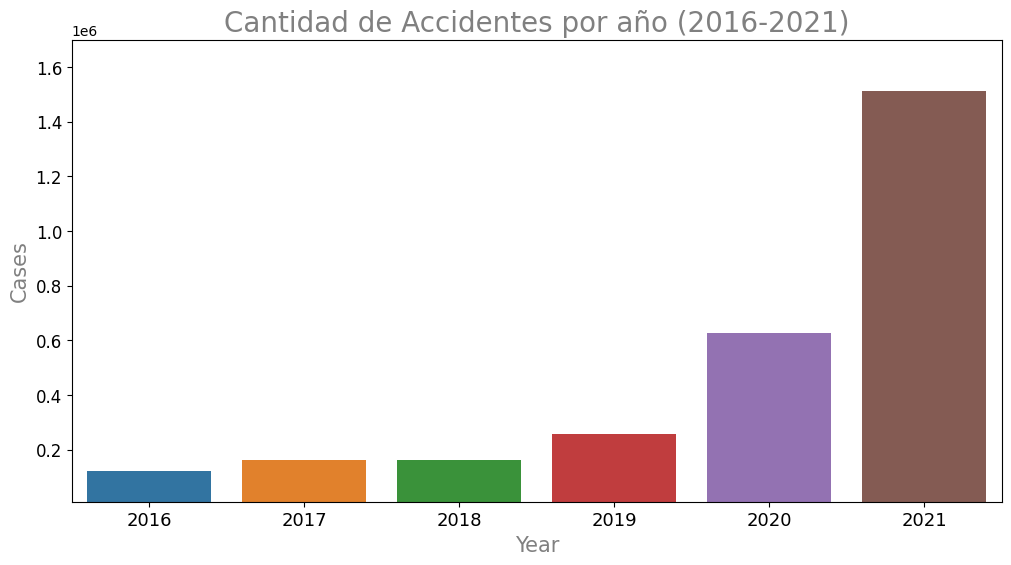

In [ ]:
# convertir  Start_Time & End_Time Variable en la funcion fecha y hora
Df.Start_Time = pd.to_datetime(Df.Start_Time)
Df.End_Time = pd.to_datetime(Df.End_Time)
Year = pd.DataFrame(Df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
Year

fig, ax = plt.subplots(figsize = (12,6))
plt.ylim(10000, 1700000)
plt.title('Cantidad de Accidentes por año (2016-2021)', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
ax=sns.barplot(y=Year['Cases'], x=Year['Year'])

##4ta Pregunta
##¿Como influye el horario, dia de semana y mes en la cantidad de accidentes?
Horario:
La mayor cantidad de accidentes se ocasionan en el horario en que las personas salen del trabajo.

Dias:
La mayor cantidad de accidentes se ocasionan en los dias laborales, siendo el dia viernes con mayor cantidad de accidentes. Luego observamos que durante el fin de semana el numero se reduce casi a mitad comparado con el viernes

Meses:
La mayor cantidad de accidentes se ocasionan en el mes de diciembre-

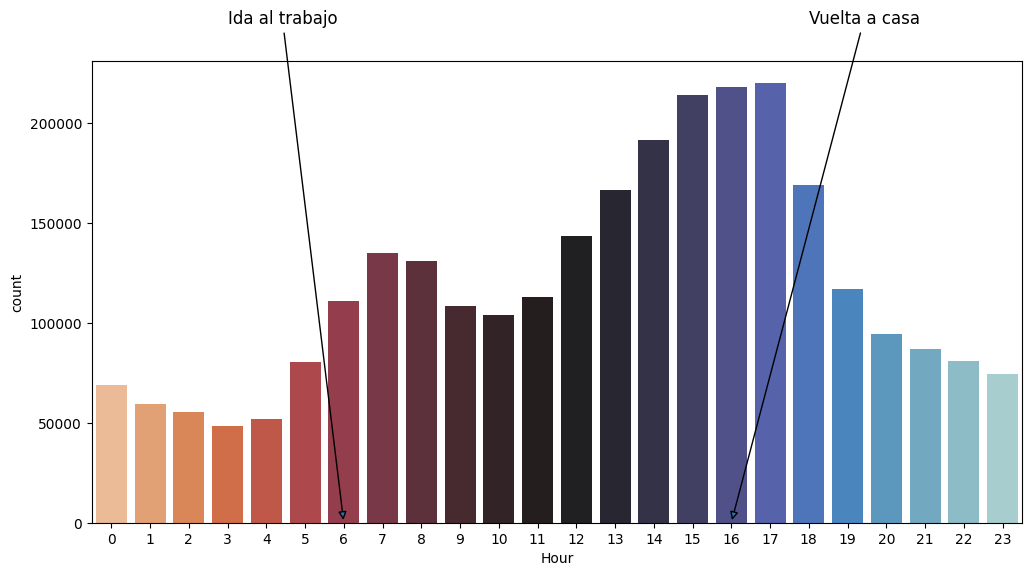

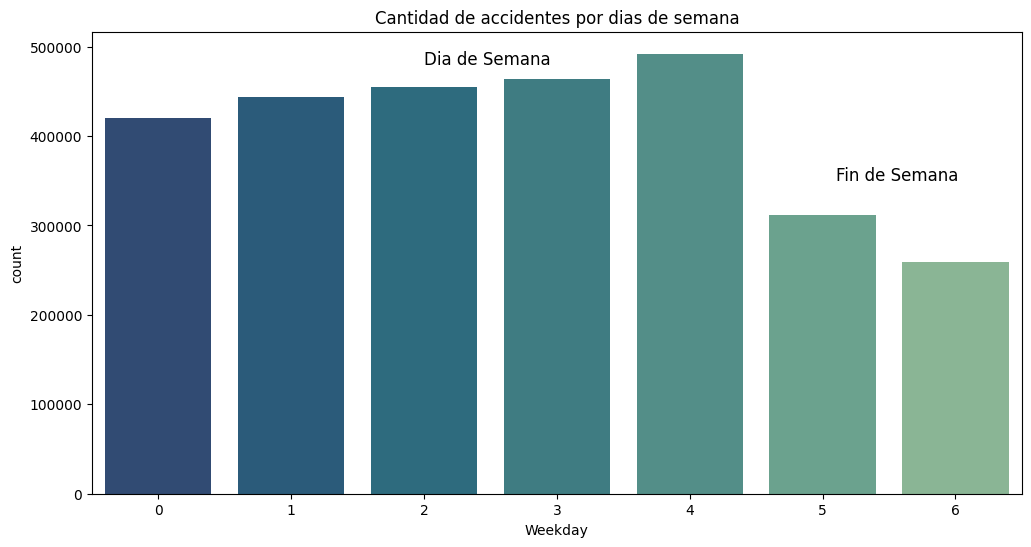

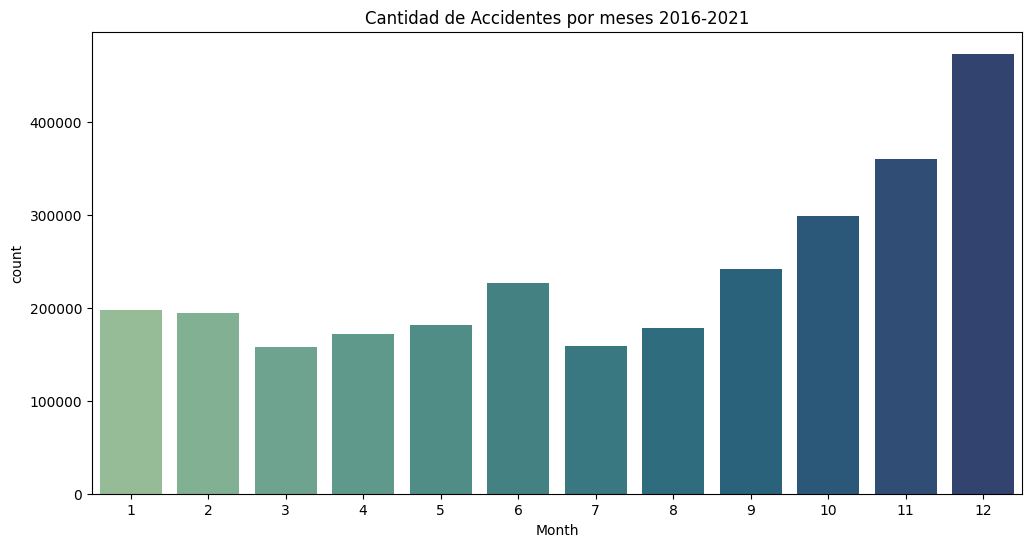

In [ ]:
Df['Month'] = Df['Start_Time'].dt.month
Df['Year'] = Df['Start_Time'].dt.year
Df['Hour'] = Df['Start_Time'].dt.hour
Df['Weekday'] = Df['Start_Time'].dt.weekday

fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x="Hour", data= Df, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,350000), fontsize=12)
plt.annotate('Ida al trabajo',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('Vuelta a casa',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

fig, ax = plt.subplots(figsize = (12,6))
c = sns.countplot(x="Weekday", data=Df, orient = 'v', palette = "crest_r")
plt.annotate('Dia de Semana',xy=(2,480000), fontsize=12)
plt.annotate('Fin de Semana',xy=(5.1,350000), fontsize=12)
c.set_title("Cantidad de accidentes por dias de semana")
plt.show()

fig, ax = plt.subplots(figsize = (12,6))
c = sns.countplot(x="Month", data=Df, orient = 'v', palette = "crest")
c.set_title("Cantidad de Accidentes por meses 2016-2021")
plt.show();

##Pregunta 5
##¿Influye el lado de conduccion en la cantidad de accidentes?¿Y en la severidad?
Obervamos que el 82% de los accidentes se producen del lado de conduccion Derecho, mientras que la severidad del accidente no esta relacionada con el lado de conduccion.

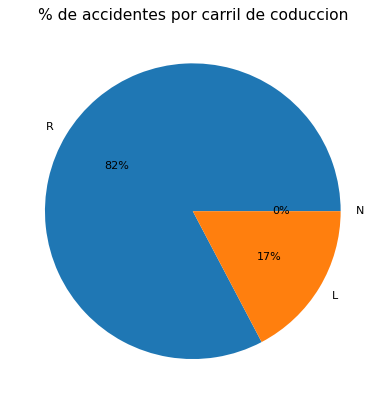

In [ ]:
Side_df = pd.DataFrame(Df['Side'].value_counts()).reset_index().rename(columns={'index':'Side', 'Side':'Cases'})

Lado= ["R" , "L", "N"]
Cases= Side_df['Cases']

fig, ax= plt.subplots(figsize=(18,6),dpi = 80)
plt.pie(Side_df['Cases'], labels= Lado, autopct='%0.1i%%' )
ax.set_title("% de accidentes por carril de coduccion", fontsize=14)
plt.show()

##Pregunta 6##
##¿Como influye en clima en la cantidad de accidentes?
En este grafico podemos obersavar como indicen las condiciones climaticas en  los accidentes en el transito entre los años (2016-2021).
Llegando a la conclusion de que los accidentes no se produccen por una condicion climatica en especial, si no en un buen clima.

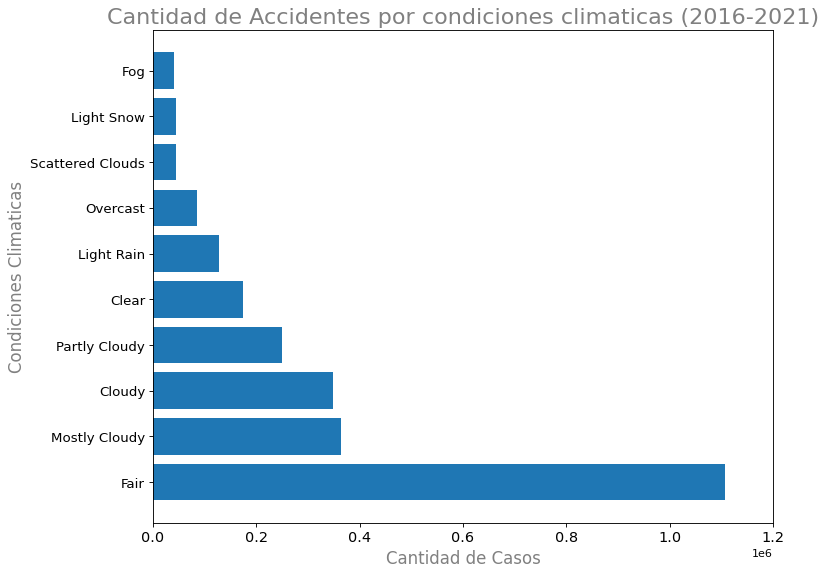

In [ ]:
weather_condition_df = pd.DataFrame(Df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

fig, ax = plt.subplots(figsize = (10,8), dpi = 80)
ax.barh(weather_condition_df['Weather_Condition'],weather_condition_df['Cases'])
plt.title('Cantidad de Accidentes por condiciones climaticas (2016-2021)', size=20, color='grey')
plt.xlabel('Cantidad de Casos', fontsize=15, color='grey')
plt.ylabel('Condiciones Climaticas', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 1200000)
plt.show()

#Data Wrangling

In [ ]:
#Orden, limpieza y preparacion del Data Set
df= Df

In [ ]:
#Calculo de duracion en horas del accidente
df['Duration(H)']=(pd.to_datetime(df.End_Time)-pd.to_datetime(df.Start_Time)).astype('timedelta64[h]')

In [ ]:
#Doy formanto a las columnas con fecha, para separarlas en año, mes, semana, dia, hora, minutos
df['Start_Time'] = pd.to_datetime(df['Start_Time'],
 format = '%Y-%m-%d %H:%M:%S',
 errors = 'coerce')

df['year'] = df['Start_Time'].dt.year
df['month'] = df['Start_Time'].dt.month
df['week'] = df['Start_Time'].dt.week
df['day'] = df['Start_Time'].dt.day
df['hour'] = df['Start_Time'].dt.hour
df['minute'] = df['Start_Time'].dt.minute
df['dayofweek'] = df['Start_Time'].dt.dayofweek

<ipython-input-47-42b7e69c224d>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Start_Time'].dt.week


In [ ]:
#Elimino columnas innecesarias para el analisis
df = df.drop(columns = ["ID","Number","Street","Side","City","County","State","Zipcode","Country","Timezone","Airport_Code","Start_Lat","Start_Lng","End_Lat","End_Lng","Start_Time","End_Time","Weather_Timestamp", "Description","Wind_Direction","Weather_Condition","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight", "Astronomical_Twilight"])
df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Hour,Weekday,Duration(H),year,month,week,day,hour,minute,dayofweek
0,3,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00,False,...,0,0,6.0,2016,2,6,8,0,37,0
1,2,0.747,36.9,NaN,91.0,29.68,10.0,NaN,0.02,False,...,5,0,6.0,2016,2,6,8,5,56,0
2,2,0.055,36.0,NaN,97.0,29.70,10.0,NaN,0.02,False,...,6,0,6.0,2016,2,6,8,6,15,0
3,2,0.123,39.0,NaN,55.0,29.65,10.0,NaN,NaN,False,...,6,0,6.0,2016,2,6,8,6,51,0
4,3,0.500,37.0,29.8,93.0,29.69,10.0,10.4,0.01,False,...,7,0,6.0,2016,2,6,8,7,53,0


In [ ]:
#Filtro el data set por año = 2020 para reducir la cantidad de datos
df= df.query('year == 2020')
df

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Hour,Weekday,Duration(H),year,month,week,day,hour,minute,dayofweek
232630,2,1.338,44.0,37.0,55.0,30.01,10.0,14.0,0.0,False,...,22,2,5776.0,2020,12,53,30,22,58,2
246924,2,1.107,60.0,60.0,64.0,29.96,10.0,7.0,0.0,False,...,19,1,6684.0,2020,10,42,13,19,19,1
247119,2,2.494,59.0,59.0,48.0,29.91,10.0,18.0,0.0,False,...,9,5,8977.0,2020,5,21,23,9,23,5
250560,2,0.841,60.0,60.0,64.0,29.96,10.0,7.0,0.0,False,...,19,1,8460.0,2020,10,42,13,19,19,1
279132,2,0.790,44.0,37.0,55.0,30.01,10.0,14.0,0.0,False,...,22,2,2181.0,2020,12,53,30,22,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362657,2,0.000,59.0,59.0,22.0,29.21,10.0,9.0,NaN,False,...,20,0,0.0,2020,1,2,6,20,59,0
2362658,2,0.000,43.0,43.0,86.0,29.85,5.0,3.0,0.0,False,...,21,0,2.0,2020,1,2,6,21,14,0
2362659,2,0.000,64.0,64.0,24.0,30.03,10.0,5.0,0.0,False,...,21,0,1.0,2020,1,2,6,21,19,0
2372960,2,0.473,28.0,19.0,92.0,29.06,7.0,9.0,0.0,False,...,0,2,0.0,2020,1,1,1,0,8,2


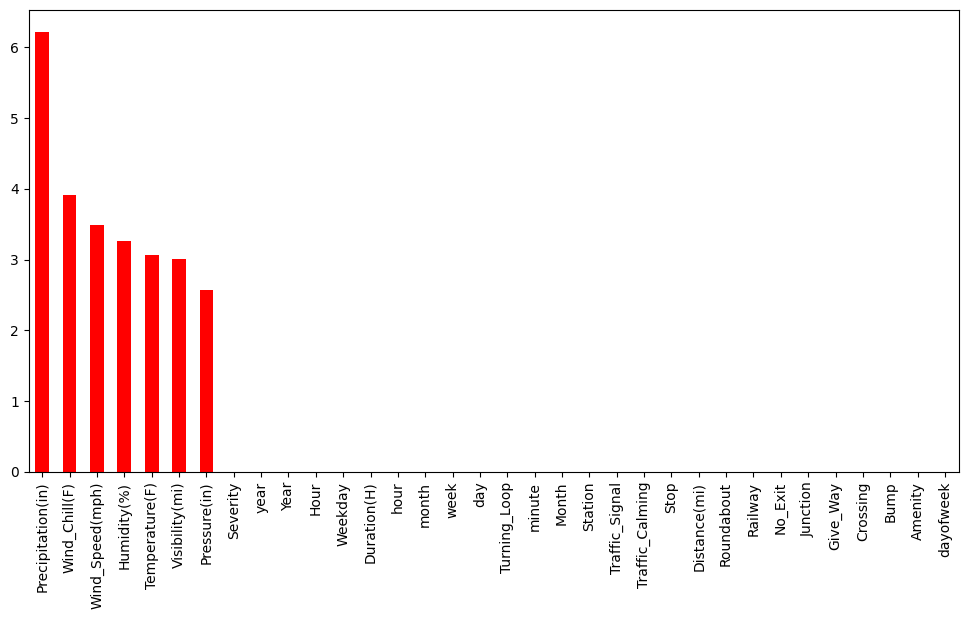

In [ ]:
#Visualizacion de nulos en porcentaje
data_missing_values = df.isnull().sum().sort_values(ascending=False) / len(df) * 100
plt.figure(figsize=(12,6))
data_missing_values.plot(kind='bar', color='r')
plt.show()

In [ ]:
#Elimino los nulos ya que es un porcentaje muy bajo del total
df.dropna(inplace=True)
df.isnull().sum()

Severity             0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Month                0
Year                 0
Hour                 0
Weekday              0
Duration(H)          0
year                 0
month                0
week                 0
day                  0
hour                 0
minute               0
dayofweek            0
dtype: int64

# Feature selecction and algorithm

Luego de analizar el Data Set llegamos a la conclusion de que la variable target que vamos a predecir es la de 'Severity', se encuentra en una columna llamada "Severity"  donde muestra la gravedad y el impacto del accidente en el transito. un número entre 1 y 4.

Es una variable de clasificacion de 4 estados


1.   Severity = 1
2.   Severity = 2
3.   Severity = 3
4.   Severity = 4

Donde 1 indica el menor impacto en el tráfico (es decir, una breve demora como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, una gran demora).

La clasificacion de esta variable se obtiene de la relacion de otras variables que estan expresadas en  el data set, como por ej:

* Dia
* Horario
* Clima
* Temp
* Humedad
* Viento
* Presion Atm
* Tiempo de accidente
* Distancia
* Cantidad de calles afectadas

El algortimo a utilizar para predecir la variable "Severity" es el de Ramdon Forest, por que para un conjunto de datos lo suficientemente grande produce un clasificador muy certero.

In [ ]:
#Grafico en la cantidad de accidentes en funcion de la Severidad
Severity_df = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})

Severity_df

,Severity,Cases
0,2,489875
1,3,40409
2,1,23596
3,4,20698


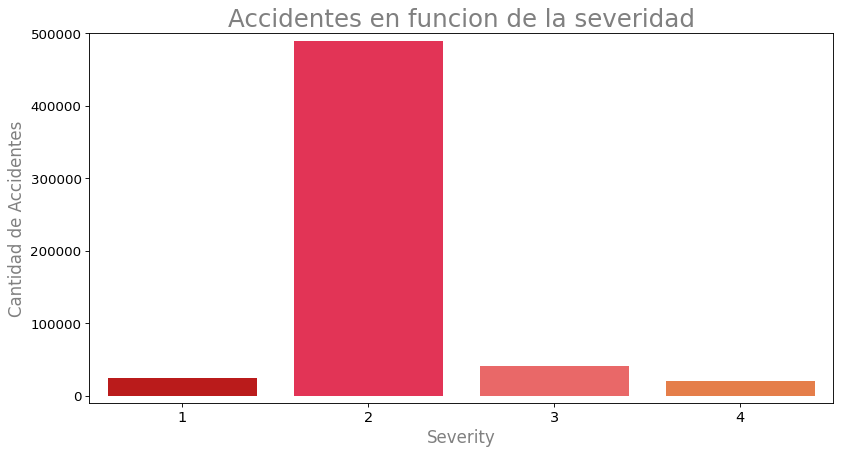

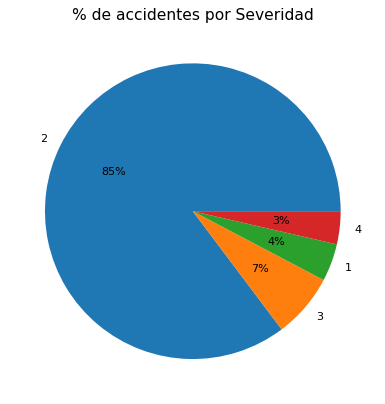

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=Severity_df['Cases'], x=Severity_df['Severity'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])
plt.ylim(-10000, 500000)
plt.title('Accidentes en funcion de la severidad', size=22, color='grey')
plt.ylabel('Cantidad de Accidentes', fontsize=15, color='grey')
plt.xlabel('Severity', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

fig, ax= plt.subplots(figsize=(18,6),dpi = 80)
plt.pie(Severity_df['Cases'], labels= Severity_df['Severity'], autopct='%0.1i%%' )
ax.set_title("% de accidentes por Severidad", fontsize=14)
plt.show()

#Desarrollo del Algoritmo

In [ ]:
#Selecciono las columnas predictorias(x) y la columna a predecir(y)
x = df.drop(columns = ["Severity"])
y = df['Severity']

x.head()


,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Hour,Weekday,Duration(H),year,month,week,day,hour,minute,dayofweek
232630,1.338,44.0,37.0,55.0,30.01,10.0,14.0,0.0,False,False,...,22,2,5776.0,2020,12,53,30,22,58,2
246924,1.107,60.0,60.0,64.0,29.96,10.0,7.0,0.0,False,False,...,19,1,6684.0,2020,10,42,13,19,19,1
247119,2.494,59.0,59.0,48.0,29.91,10.0,18.0,0.0,False,False,...,9,5,8977.0,2020,5,21,23,9,23,5
250560,0.841,60.0,60.0,64.0,29.96,10.0,7.0,0.0,False,False,...,19,1,8460.0,2020,10,42,13,19,19,1
279132,0.790,44.0,37.0,55.0,30.01,10.0,14.0,0.0,False,False,...,22,2,2181.0,2020,12,53,30,22,58,2


**Modelo Ramdon Forest**

In [ ]:
#x_train e y_train para entrenamiento
#x_test e y_test para prueba

x_train, x_test, y_train, y_test = train_test_split(x , y, train_size= 0.50, random_state= 0)
rf = RandomForestClassifier()

#Entrenamos el modelo
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
Yf_pred = rf.predict(x_test)
Yf_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
Y_trainF= rf.predict(x_train)
Y_trainF

array([4, 2, 2, ..., 2, 4, 2])

**Matriz de Confusion para el modelo de Random Forest**

In [ ]:
Matriz_ConfusionF= confusion_matrix(y_test, Yf_pred)
Matriz_ConfusionF
#En este caso hay 4 tipos de clasificacion en la severidad (1,2,3,4)

array([[  4924,   6186,    462,     81],
       [   925, 240722,   2693,    826],
       [   227,  11484,   7908,    524],
       [    65,   5428,    882,   3952]])

<Figure size 2000x2000 with 0 Axes>

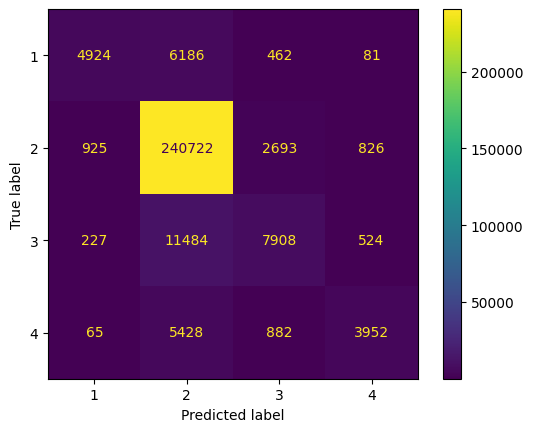

In [ ]:
#Graficamos la matriz
plt.figure(figsize=(20,20))
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, display_labels=['1','2','3','4'])
plt.show()

#Validacion y despliegue

In [ ]:
#Todas las metricas para el analis de la matriz
print(metrics.classification_report(y_test, Yf_pred))

              precision    recall  f1-score   support

           1       0.80      0.42      0.55     11653
           2       0.91      0.98      0.95    245166
           3       0.66      0.39      0.49     20143
           4       0.73      0.38      0.50     10327

    accuracy                           0.90    287289
   macro avg       0.78      0.54      0.62    287289
weighted avg       0.88      0.90      0.88    287289



**Conclusiones**

El modelo tiene una exactitud de %90

F1- Score
1. El modelo no detecta la clase muy bien pero cuando lo hace es bastante confiable
2. El modelo maneja perfectamente la clase
3. El modelo no detecta la clase muy bien pero cuando lo hace es bastante confiable
4. El modelo no detecta la clase muy bien pero cuando lo hace es bastante confiable

Alta precision en 3 de las 4 variables. Mayor precision en la clase 2, esto es un buen punto ya que la variable 2 ocupa el 85% del volumen de los datos.


**Overfitting**

Este caso existe en la variable de Severidad = 2

Para resolverlos lo que podemos hacer es  equilibrar los datos, vamos a submuestrear todas las categorías al número de registros de la categoría minoritaria, en este caso la gravedad 4 (20.600 datos ).
Es decir tener las 4 variables a clasificar con la misma cantidad de datos, 20.000 de cada uno. Una vez que tengamos el data frame con la misma cantidad de muestras para cada variable a predecir ejecutamos nuevamente el modelo para poder analizar si mejora el comportamiento de Overfitting


In [ ]:
#Separo en 4 data set con 20.000 datos de cada variable
df1= df[df['Severity'] == 1].sample(n=20600)
df2= df[df['Severity'] == 2].sample(n=20600)
df3= df[df['Severity'] == 3].sample(n=20600)
df4= df[df['Severity'] == 4].sample(n=20600)


In [ ]:
#Uno los 4 data frame
dfSub = pd.concat([df1, df2, df3, df4])
dfSub

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Hour,Weekday,Duration(H),year,month,week,day,hour,minute,dayofweek
2083035,1,0.000,87.0,87.0,65.0,30.02,10.0,12.0,0.0,False,...,13,6,0.0,2020,5,22,31,13,22,6
2117265,1,0.000,54.0,54.0,55.0,25.68,10.0,6.0,0.0,False,...,8,3,0.0,2020,5,20,14,8,0,3
2075604,1,0.000,68.0,68.0,52.0,25.76,10.0,3.0,0.0,False,...,8,2,0.0,2020,5,22,27,8,58,2
2083216,1,0.000,92.0,92.0,21.0,27.13,10.0,8.0,0.0,False,...,11,6,1.0,2020,5,22,31,11,17,6
2245376,1,0.000,71.0,71.0,90.0,29.95,10.0,3.0,0.0,False,...,5,2,0.0,2020,4,15,8,5,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118680,4,0.359,57.0,57.0,100.0,29.00,3.0,0.0,0.0,False,...,0,5,0.0,2020,5,20,16,0,46,5
2273850,4,0.000,50.0,50.0,94.0,29.58,4.0,3.0,0.0,False,...,8,4,0.0,2020,4,17,24,8,24,4
2120870,4,0.686,66.0,66.0,78.0,28.96,10.0,0.0,0.0,False,...,0,6,0.0,2020,5,20,17,0,29,6
2202177,4,0.692,59.0,59.0,67.0,29.17,10.0,5.0,0.0,False,...,16,0,0.0,2020,3,12,16,16,21,0


In [ ]:
dfSub1 = pd.DataFrame(dfSub['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})
dfSub1

,Severity,Cases
0,1,20600
1,2,20600
2,3,20600
3,4,20600


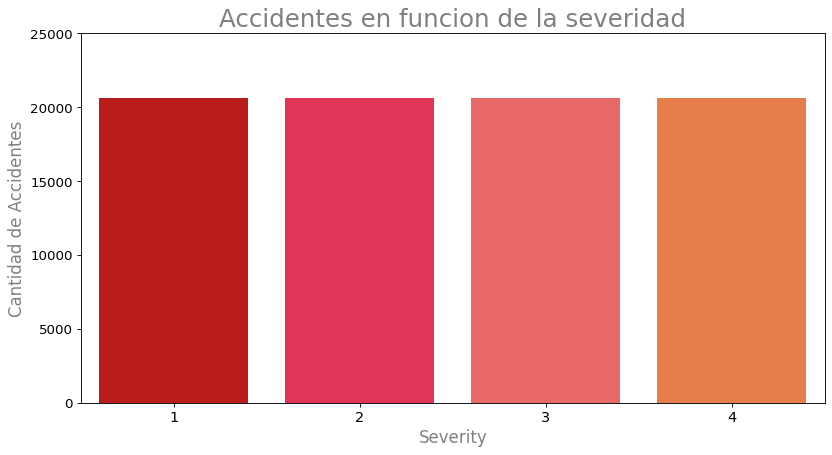

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=dfSub1['Cases'], x=dfSub1['Severity'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])
plt.ylim(0, 25000)
plt.title('Accidentes en funcion de la severidad', size=22, color='grey')
plt.ylabel('Cantidad de Accidentes', fontsize=15, color='grey')
plt.xlabel('Severity', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Selecciono las columnas predictorias(x) y la columna a predecir(y)
Xs = dfSub.drop(columns = ["Severity"])
Ys = dfSub['Severity']

X_train, X_test, Y_train, Y_test = train_test_split(Xs , Ys, train_size= 0.85, random_state= 0)

#Entrenamos el modelo
rf1 = RandomForestClassifier()
rf1.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred1= rf1.predict(X_test)
Y_pred1

array([3, 2, 4, ..., 4, 3, 4])

In [ ]:
Y_train1= rf1.predict(X_train)
Y_train1

array([3, 4, 3, ..., 3, 3, 4])

In [ ]:
#Generamos la matriz de confusion
Matriz_Confusion= confusion_matrix(Y_test, Y_pred1)
Matriz_Confusion

array([[2469,   48,  392,   97],
       [ 238, 2326,  309,  188],
       [ 413,   83, 2215,  419],
       [ 153,  531,  349, 2130]])

<Figure size 2000x2000 with 0 Axes>

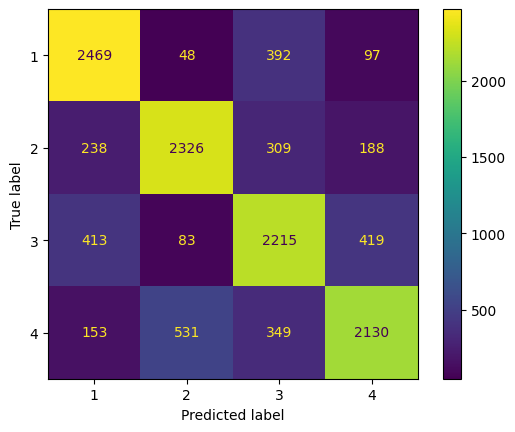

In [ ]:
#Graficamos la matriz
plt.figure(figsize=(20,20))
ConfusionMatrixDisplay.from_estimator(rf1, X_test, Y_test, display_labels=['1','2','3','4'])
plt.show()

In [ ]:
# Todas las metricas para el analisis de la matriz
print(metrics.classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           1       0.75      0.82      0.79      3006
           2       0.78      0.76      0.77      3061
           3       0.68      0.71      0.69      3130
           4       0.75      0.67      0.71      3163

    accuracy                           0.74     12360
   macro avg       0.74      0.74      0.74     12360
weighted avg       0.74      0.74      0.74     12360



Haciendo el sub muestro podemos ver como mejoran las metricas del modelo Ramdon Forest, sobre todo el recal y el f1 score. Esto quiere decir que tenemos un modelo que se ajusta a distintos datos que le pasemos para que analice.

#Conclusiones


*   Cuando miramos la latitud y la longitud de los accidentes, podemos ver que los accidentes se distribuyen de manera similar al mapa de América. Este no es un resultado sorprendente, asumiendo que los accidentes ocurrieron en Estados Unidos.
*   A traves del analisis llegamos a la conclusion que en las zonas costeras se producen el mayor numero de accidentes, agrupando el 77% del total de los accidentes en EE.UU

* Notamos un crecimiento exponencial en la cantidad de accidentes a medida que pasan los años

*  Horario:
La mayor cantidad de accidentes se ocasionan en el horario en que las personas salen del trabajo.

* Dias:
La mayor cantidad de accidentes se ocasionan en los dias laborales, siendo el dia viernes con mayor cantidad de accidentes. Luego observamos que durante el fin de semana el numero se reduce casi a mitad comparado con el viernes

* Meses:
La mayor cantidad de accidentes se ocasionan en el mes de diciembre

* Obervamos que el 82% de los accidentes se producen del lado de conduccion Derecho, mientras que la severidad del accidente no esta relacionada con el lado de conduccion.

* Llegamos a la conclusion de que los accidentes no se produccen por una condicion climatica en especial, si no en un buen clima.
